# Ingest the data: figure out a way to put the data in a structure so that you can query it as described in Part 2.


In [ ]:
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("C:/Users\DELL\Downloads\correct_twitter_201904 - correct_twitter_201904.tsv", sep = '\t')
df.head()

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
0,1.131595e+18,britney_201904,2022-02-28 09:34:44.627023-05:00,2022-02-28 09:34:44.627023-05:00,True,True,False,False,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
1,1.131595e+18,britney_201904,2022-02-28 09:34:44.626921-05:00,2022-02-28 09:34:44.626921-05:00,True,True,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
2,1.131590e+18,britney_201904,2022-02-28 09:34:44.634058-05:00,2022-02-28 09:34:44.634058-05:00,True,True,False,False,False,False,...,None,None,None,None,None,None,None,None,None,None
3,1.131595e+18,britney_201904,2022-02-28 09:34:44.627125-05:00,2022-02-28 09:34:44.627125-05:00,True,True,False,False,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
4,1.131595e+18,britney_201904,2022-02-28 09:34:44.627227-05:00,2022-02-28 09:34:44.627227-05:00,True,True,False,False,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None


#  Preprocess the Data


In [23]:
print(df.columns)

Index(['id', 'event', 'ts1', 'ts2', 'from_stream', 'directly_from_stream',
       'from_search', 'directly_from_search', 'from_quote_search',
       'directly_from_quote_search', 'from_convo_search',
       'directly_from_convo_search', 'from_timeline_search',
       'directly_from_timeline_search', 'text', 'lang', 'author_id',
       'author_handle', 'created_at', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'source', 'author_follower_count', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'replied_to',
       'replied_to_author_id', 'replied_to_handle',
       'replied_to_follower_count', 'quoted', 'quoted_author_id',
       'quoted_handle', 'quoted_follower_count', 'retweeted',
       'retweeted_author_id', 'retweeted_handle', 'retweeted_follower_count',
       'mentioned_author_ids', 'mentioned_handles', 'hashtags', 'urls',
       'media_keys', 'place_id'],
      dtype='object')


In [24]:
df['ts1'] = pd.to_datetime(df['ts1'])

# Extract day and time from the timestamp
df['date'] = df['ts1'].dt.date
df['time'] = df['ts1'].dt.time

# Preview the changes
print(df[['ts1', 'date', 'time']].head())

                               ts1        date             time
0 2022-02-28 09:34:44.627023-05:00  2022-02-28  09:34:44.627023
1 2022-02-28 09:34:44.626921-05:00  2022-02-28  09:34:44.626921
2 2022-02-28 09:34:44.634058-05:00  2022-02-28  09:34:44.634058
3 2022-02-28 09:34:44.627125-05:00  2022-02-28  09:34:44.627125
4 2022-02-28 09:34:44.627227-05:00  2022-02-28  09:34:44.627227


In [25]:
corelation =df.corr()
corelation

C:\Users\DELL\AppData\Local\Temp\ipykernel_18608\3671557852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation =df.corr()


,id,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,from_convo_search,directly_from_convo_search,from_timeline_search,directly_from_timeline_search,author_id,conversation_id,possibly_sensitive,author_follower_count,retweet_count,reply_count,like_count,quote_count
id,1.000000,NaN,0.052572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002425,0.405222,-0.005274,-0.001541,0.028505,-0.004487,-0.002724,-0.003581
from_stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_stream,0.052572,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002116,0.035206,-0.005188,-0.096446,-0.013463,-0.104100,-0.085767,-0.096541
from_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_quote_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_quote_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_convo_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_convo_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_timeline_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
list(df.columns)

['id',
 'event',
 'ts1',
 'ts2',
 'from_stream',
 'directly_from_stream',
 'from_search',
 'directly_from_search',
 'from_quote_search',
 'directly_from_quote_search',
 'from_convo_search',
 'directly_from_convo_search',
 'from_timeline_search',
 'directly_from_timeline_search',
 'text',
 'lang',
 'author_id',
 'author_handle',
 'created_at',
 'conversation_id',
 'possibly_sensitive',
 'reply_settings',
 'source',
 'author_follower_count',
 'retweet_count',
 'reply_count',
 'like_count',
 'quote_count',
 'replied_to',
 'replied_to_author_id',
 'replied_to_handle',
 'replied_to_follower_count',
 'quoted',
 'quoted_author_id',
 'quoted_handle',
 'quoted_follower_count',
 'retweeted',
 'retweeted_author_id',
 'retweeted_handle',
 'retweeted_follower_count',
 'mentioned_author_ids',
 'mentioned_handles',
 'hashtags',
 'urls',
 'media_keys',
 'place_id',
 'date',
 'time']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88037 entries, 0 to 88036
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype                                 
---  ------                         --------------  -----                                 
 0   id                             88037 non-null  float64                               
 1   event                          88037 non-null  object                                
 2   ts1                            88037 non-null  datetime64[ns, pytz.FixedOffset(-300)]
 3   ts2                            88037 non-null  object                                
 4   from_stream                    88037 non-null  bool                                  
 5   directly_from_stream           88037 non-null  bool                                  
 6   from_search                    88037 non-null  bool                                  
 7   directly_from_search           88037 non-null  bool                

In [28]:
def convert_bool_to_int(df, column_name):
    df[column_name] = df[column_name].astype(int)
    return df

# Apply the function to the boolean column
df = convert_bool_to_int(df, 'from_stream')
df = convert_bool_to_int(df, 'directly_from_stream')
df = convert_bool_to_int(df, 'from_search')
df = convert_bool_to_int(df, 'directly_from_search')
df

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
0,1131594960443199488,britney_201904,2022-02-28 09:34:44.627023-05:00,2022-02-28 09:34:44.627023-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
1,1131594976750653440,britney_201904,2022-02-28 09:34:44.626921-05:00,2022-02-28 09:34:44.626921-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
2,1131589737955942405,britney_201904,2022-02-28 09:34:44.634058-05:00,2022-02-28 09:34:44.634058-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
3,1131594909469892610,britney_201904,2022-02-28 09:34:44.627125-05:00,2022-02-28 09:34:44.627125-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
4,1131594812694511617,britney_201904,2022-02-28 09:34:44.627227-05:00,2022-02-28 09:34:44.627227-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88032,1122977274352082944,britney_201904,2022-02-28 09:47:43.066500-05:00,2022-02-28 09:47:43.066500-05:00,1,1,0,0,False,False,...,1122975837500989440,2934938957,STORMISKELLYBAG,13773,None,None,None,None,None,None
88033,1122977257969127429,britney_201904,2022-02-28 09:47:43.066605-05:00,2022-02-28 09:47:43.066605-05:00,1,1,0,0,False,False,...,1118942889785085958,613702825,keanuorange,1422,None,None,None,None,None,None
88034,1122977009347518466,britney_201904,2022-02-28 09:47:43.066708-05:00,2022-02-28 09:47:43.066708-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
88035,1122976878812442626,britney_201904,2022-02-28 09:47:43.066810-05:00,2022-02-28 09:47:43.066810-05:00,1,1,0,0,False,False,...,1122898327895519233,846864187015888896,TheBlastNews,11533,None,None,None,None,None,None


In [17]:
corealtion_again = df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_18608\749935843.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corealtion_again = tweets_df.corr()


In [18]:
corealtion_again

,id,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,from_convo_search,directly_from_convo_search,from_timeline_search,directly_from_timeline_search,author_id,conversation_id,possibly_sensitive,author_follower_count,retweet_count,reply_count,like_count,quote_count
id,1.000000,NaN,0.052572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002425,0.405222,-0.005274,-0.001541,0.028505,-0.004487,-0.002724,-0.003581
from_stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_stream,0.052572,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002116,0.035206,-0.005188,-0.096446,-0.013463,-0.104100,-0.085767,-0.096541
from_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_quote_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_quote_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_convo_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directly_from_convo_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_timeline_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

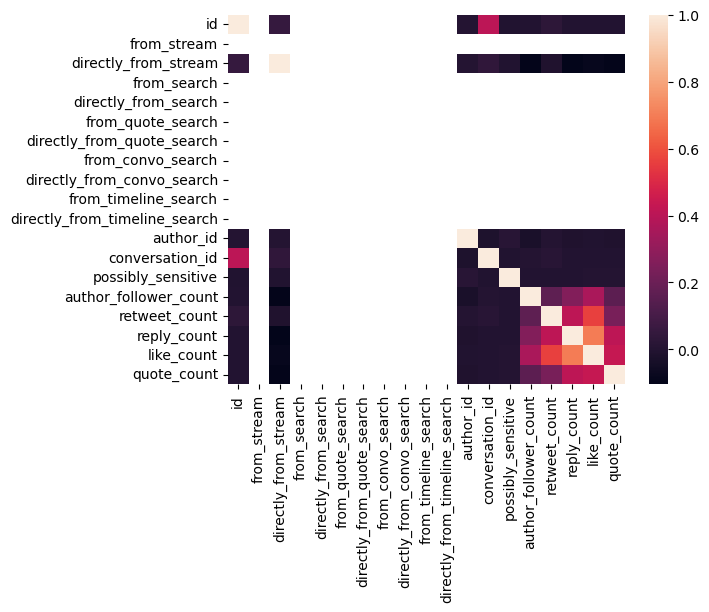

In [17]:
import seaborn as sns
sns.heatmap(corealtion_again)

# Part 2: Query Functionality

In [57]:
def search_term(term):
    # Filter rows where the tweet_text contains the search term
    return df[df['text'].str.contains(term, case=False, na=False)]
df

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id
0,1131594960443199488,britney_201904,2022-02-28 09:34:44.627023-05:00,2022-02-28 09:34:44.627023-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
1,1131594976750653440,britney_201904,2022-02-28 09:34:44.626921-05:00,2022-02-28 09:34:44.626921-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
2,1131589737955942405,britney_201904,2022-02-28 09:34:44.634058-05:00,2022-02-28 09:34:44.634058-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
3,1131594909469892610,britney_201904,2022-02-28 09:34:44.627125-05:00,2022-02-28 09:34:44.627125-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
4,1131594812694511617,britney_201904,2022-02-28 09:34:44.627227-05:00,2022-02-28 09:34:44.627227-05:00,1,1,0,0,False,False,...,1130917791752757254,3042894016,Iesbwian,22760,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88032,1122977274352082944,britney_201904,2022-02-28 09:47:43.066500-05:00,2022-02-28 09:47:43.066500-05:00,1,1,0,0,False,False,...,1122975837500989440,2934938957,STORMISKELLYBAG,13773,None,None,None,None,None,None
88033,1122977257969127429,britney_201904,2022-02-28 09:47:43.066605-05:00,2022-02-28 09:47:43.066605-05:00,1,1,0,0,False,False,...,1118942889785085958,613702825,keanuorange,1422,None,None,None,None,None,None
88034,1122977009347518466,britney_201904,2022-02-28 09:47:43.066708-05:00,2022-02-28 09:47:43.066708-05:00,1,1,0,0,False,False,...,None,None,None,None,None,None,None,None,None,None
88035,1122976878812442626,britney_201904,2022-02-28 09:47:43.066810-05:00,2022-02-28 09:47:43.066810-05:00,1,1,0,0,False,False,...,1122898327895519233,846864187015888896,TheBlastNews,11533,None,None,None,None,None,None


# Number of Tweets Containing the Term per Day

In [58]:
def tweets_per_day(term):
    df = search_term(term)

    # Convert the ts1 column to datetime if it's not done already
    df['ts1'] = pd.to_datetime(df['ts1'])  # Assuming ts1 is your ts1 column

    # Extracting date from ts1
    df['date'] = df['ts1'].dt.date  # Create the 'date' column

    # Optionally, check the DataFrame structure
    print(df.columns)  # Check if 'date' is now present

    # Filter out tweets with text and group by date
    tweets_with_text = df[df['text'].notnull()]
    return tweets_with_text.groupby('date').size()

# Call the function with your search term
result = tweets_per_day('your_search_term')
print(result)

Index(['id', 'event', 'ts1', ' ts2', 'from_stream', 'directly_from_stream',
       'from_search', 'directly_from_search', 'from_quote_search',
       'directly_from_quote_search', 'from_convo_search',
       'directly_from_convo_search', 'from_timeline_search',
       'directly_from_timeline_search', 'text', 'lang', 'author_id',
       'author_handle', 'created_at', 'conversation_id', 'possibly_sensitive',
       'reply_settings', 'source', 'author_follower_count', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'replied_to',
       'replied_to_author_id', 'replied_to_handle',
       'replied_to_follower_count', 'quoted', 'quoted_author_id',
       'quoted_handle', 'quoted_follower_count', 'retweeted',
       'retweeted_author_id', 'retweeted_handle', 'retweeted_follower_count',
       'mentioned_author_ids', 'mentioned_handles', 'hashtags', 'urls',
       'media_keys', 'place_id', 'date'],
      dtype='object')
Series([], dtype: int64)


In [ ]:
 Number of Unique Users Posting Tweets Containing the Term

In [59]:
def unique_users(term):
    df = search_term(term)
    unique_count = df['id'].nunique()
    return df, unique_count

# Call the function and unpack the results
df, unique_count = unique_users('your_search_term')

# Print the  DataFrame and the unique user count
print(df)
print("Unique users:", unique_count)



Empty DataFrame
Columns: [id, event, ts1,  ts2, from_stream, directly_from_stream, from_search, directly_from_search, from_quote_search, directly_from_quote_search, from_convo_search, directly_from_convo_search, from_timeline_search, directly_from_timeline_search, text, lang, author_id, author_handle, created_at, conversation_id, possibly_sensitive, reply_settings, source, author_follower_count, retweet_count, reply_count, like_count, quote_count, replied_to, replied_to_author_id, replied_to_handle, replied_to_follower_count, quoted, quoted_author_id, quoted_handle, quoted_follower_count, retweeted, retweeted_author_id, retweeted_handle, retweeted_follower_count, mentioned_author_ids, mentioned_handles, hashtags, urls, media_keys, place_id]
Index: []

[0 rows x 46 columns]
Unique users: 0


# Average Number of Likes for Tweets Containing the Term

In [65]:
def like_count(term):
    df = search_term(term)
    return df['like_count'].mean()
df

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id


#  Place IDs Where Tweets Containing the Term Came From

In [61]:
def place_ids(term):
    df = search_term(term)
    return df['place_id'].unique()
df

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id


# Time of Day When Tweets Were Posted

In [62]:
def tweet_times(term):
    df = search_term(term)
    return df['time']
df

,id,event,ts1,ts2,from_stream,directly_from_stream,from_search,directly_from_search,from_quote_search,directly_from_quote_search,...,retweeted,retweeted_author_id,retweeted_handle,retweeted_follower_count,mentioned_author_ids,mentioned_handles,hashtags,urls,media_keys,place_id


# User Who Posted the Most Tweets Containing the Term

In [63]:
def top_user(term):
    df = search_term(term)
    return df.groupby('id').size().idxmax()
df.groupby

<bound method DataFrame.groupby of Empty DataFrame
Columns: [id, event, ts1,  ts2, from_stream, directly_from_stream, from_search, directly_from_search, from_quote_search, directly_from_quote_search, from_convo_search, directly_from_convo_search, from_timeline_search, directly_from_timeline_search, text, lang, author_id, author_handle, created_at, conversation_id, possibly_sensitive, reply_settings, source, author_follower_count, retweet_count, reply_count, like_count, quote_count, replied_to, replied_to_author_id, replied_to_handle, replied_to_follower_count, quoted, quoted_author_id, quoted_handle, quoted_follower_count, retweeted, retweeted_author_id, retweeted_handle, retweeted_follower_count, mentioned_author_ids, mentioned_handles, hashtags, urls, media_keys, place_id]
Index: []

[0 rows x 46 columns]>